In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Converting Total Charges into float

In [7]:
#Error because there was empty ' ' string
"""pd.to_numeric(data.TotalCharges)"""

'pd.to_numeric(data.TotalCharges)'

In [8]:
data.loc[488]['TotalCharges']

' '

In [9]:
pd.to_numeric(data.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
new_data=data[data.TotalCharges!=' ']

In [13]:
new_data.shape

(7032, 21)

In [14]:
new_data.TotalCharges=pd.to_numeric(new_data.TotalCharges,errors='coerce')

/home/pratik/.local/lib/python3.6/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
new_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
new_data.TotalCharges.dtypes

dtype('float64')

In [17]:
new_data[new_data.Churn=='No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [18]:
new_data.Churn.value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

In [19]:
tenure_churn_no=new_data[new_data.Churn=='No'].tenure
tenure_churn_yes=new_data[new_data.Churn=='Yes'].tenure

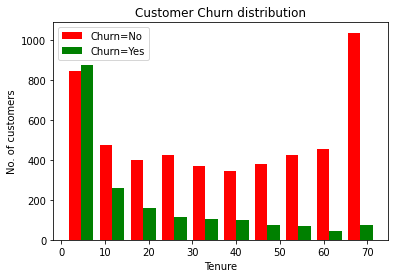

In [20]:
plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'],label=['Churn=No','Churn=Yes'])
plt.title('Customer Churn distribution')
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.legend()
plt.show()

In [21]:
mc_churn_no=new_data[new_data.Churn=='No'].MonthlyCharges
mc_churn_yes=new_data[new_data.Churn=='Yes'].MonthlyCharges

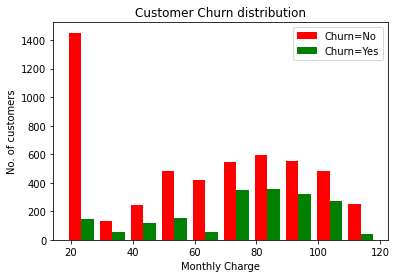

In [22]:
plt.hist([mc_churn_no,mc_churn_yes],color=['red','green'],label=['Churn=No','Churn=Yes'])
plt.title('Customer Churn distribution')
plt.xlabel('Monthly Charge')
plt.ylabel('No. of customers')
plt.legend()
plt.show()

In [23]:
new_data.drop('customerID',axis=1,inplace=True)
new_data.head()

/home/pratik/.local/lib/python3.6/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
for column in new_data:
    if new_data[column].dtypes=='object':
        print(f'{column} -> {new_data[column].unique()}')

gender -> ['Female' 'Male']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No phone service' 'No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes' 'No internet service']
OnlineBackup -> ['Yes' 'No' 'No internet service']
DeviceProtection -> ['No' 'Yes' 'No internet service']
TechSupport -> ['No' 'Yes' 'No internet service']
StreamingTV -> ['No' 'Yes' 'No internet service']
StreamingMovies -> ['No' 'Yes' 'No internet service']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -> ['No' 'Yes']


In [25]:
new_data.replace('No internet service','No',inplace=True)

/home/pratik/.local/lib/python3.6/site-packages/pandas/core/frame.py:4382: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [26]:
for column in new_data:
    if new_data[column].dtypes=='object':
        print(f'{column} -> {new_data[column].unique()}')

gender -> ['Female' 'Male']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No phone service' 'No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes']
OnlineBackup -> ['Yes' 'No']
DeviceProtection -> ['No' 'Yes']
TechSupport -> ['No' 'Yes']
StreamingTV -> ['No' 'Yes']
StreamingMovies -> ['No' 'Yes']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -> ['No' 'Yes']


In [27]:
new_data.replace('No phone service','No',inplace=True)

In [28]:
for column in new_data:
    if new_data[column].dtypes=='object':
        print(f'{column} -> {new_data[column].unique()}')

gender -> ['Female' 'Male']
Partner -> ['Yes' 'No']
Dependents -> ['No' 'Yes']
PhoneService -> ['No' 'Yes']
MultipleLines -> ['No' 'Yes']
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> ['No' 'Yes']
OnlineBackup -> ['Yes' 'No']
DeviceProtection -> ['No' 'Yes']
TechSupport -> ['No' 'Yes']
StreamingTV -> ['No' 'Yes']
StreamingMovies -> ['No' 'Yes']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> ['Yes' 'No']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -> ['No' 'Yes']


In [29]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [30]:
yes_no_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [31]:
len(yes_no_columns)

12

In [32]:
for columns in yes_no_columns:
    new_data[columns].replace({'No':0,'Yes':1},inplace=True)

/home/pratik/.local/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [33]:
for column in new_data:
    if new_data[column].dtypes=='object':
        print(f'{column} -> {new_data[column].unique()}')

gender -> ['Female' 'Male']
InternetService -> ['DSL' 'Fiber optic' 'No']
Contract -> ['Month-to-month' 'One year' 'Two year']
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [34]:
for column in new_data:
    print(f'{column} -> {new_data[column].unique()}')

gender -> ['Female' 'Male']
SeniorCitizen -> [0 1]
Partner -> [1 0]
Dependents -> [0 1]
tenure -> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService -> [0 1]
MultipleLines -> [0 1]
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> [0 1]
OnlineBackup -> [1 0]
DeviceProtection -> [0 1]
TechSupport -> [0 1]
StreamingTV -> [0 1]
StreamingMovies -> [0 1]
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> [1 0]
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges -> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn -> [0 1]


In [35]:
new_data.replace({'Female':0,'Male':1},inplace=True)

In [36]:
for column in new_data:
    print(f'{column} -> {new_data[column].unique()}')

gender -> [0 1]
SeniorCitizen -> [0 1]
Partner -> [1 0]
Dependents -> [0 1]
tenure -> [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService -> [0 1]
MultipleLines -> [0 1]
InternetService -> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -> [0 1]
OnlineBackup -> [1 0]
DeviceProtection -> [0 1]
TechSupport -> [0 1]
StreamingTV -> [0 1]
StreamingMovies -> [0 1]
Contract -> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -> [1 0]
PaymentMethod -> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges -> [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges -> [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn -> [0 1]


In [37]:
new_data_2=pd.get_dummies(new_data,columns=['InternetService','Contract','PaymentMethod'])

In [38]:
new_data_2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [39]:
new_data_2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
new_data_2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4348,0,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1534,0,0,1,1,69,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2800,0,0,1,1,20,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1597,1,0,1,0,48,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0


In [41]:
len(new_data_2.columns)

27

In [42]:
new_data_2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

# Scaling the datas

In [43]:
scale_columns=['tenure','MonthlyCharges','TotalCharges']

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler=MinMaxScaler()

In [46]:
new_data_2[scale_columns]=scaler.fit_transform(new_data_2[scale_columns])

In [47]:
new_data_2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6457,1,0,1,1,0.225352,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
197,1,0,0,0,0.816901,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
153,1,0,1,1,0.859155,1,0,1,1,1,...,1,0,0,0,0,1,0,0,1,0
2795,0,1,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5509,0,0,0,1,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [48]:
for column in new_data_2:
    print(f'{column} -> {new_data_2[column].unique()}')

gender -> [0 1]
SeniorCitizen -> [0 1]
Partner -> [1 0]
Dependents -> [0 1]
tenure -> [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService -> [0 1]
MultipleLines -> [0 1]
OnlineSecurity -> [0 1]
OnlineBackup -> [1 0]
DeviceProtection -> 

In [49]:
x=new_data_2.drop('Churn',axis=1)

In [50]:
y=new_data_2.Churn

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [53]:
print(f'{x_train.shape} , {x_test.shape}')

(5625, 26) , (1407, 26)


In [54]:
import tensorflow as tf
from tensorflow import keras

/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pratik/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [55]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [57]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
5625/5625 [==============================] - 0s 76us/sample - loss: 0.6009 - acc: 0.6699
Epoch 2/100
5625/5625 [==============================] - 0s 53us/sample - loss: 0.4522 - acc: 0.7883
Epoch 3/100
5625/5625 [==============================] - 0s 51us/sample - loss: 0.4292 - acc: 0.7968
Epoch 4/100
5625/5625 [==============================] - 0s 44us/sample - loss: 0.4245 - acc: 0.8007
Epoch 5/100
5625/5625 [==============================] - 0s 48us/sample - loss: 0.4216 - acc: 0.8032
Epoch 6/100
5625/5625 [==============================] - 0s 44us/sample - loss: 0.4196 - acc: 0.8025
Epoch 7/100
5625/5625 [==============================] - 0s 47us/sample - loss: 0.4190 - acc: 0.8046
Epoch 8/100
5625/5625 [==============================] - 0s 64us/sample - loss: 0.4178 - acc: 0.8057
Epoch 9/100
5625/5625 [==============================] - 0s 53us/sample - loss: 0.4179 - acc: 0.8050
Epoch 10/100
5625/5625 [==============================] - 0s 52us/sample - loss: 0.4164 - a

5625/5625 [==============================] - 0s 39us/sample - loss: 0.3921 - acc: 0.8194
Epoch 82/100
5625/5625 [==============================] - 0s 43us/sample - loss: 0.3920 - acc: 0.8167
Epoch 83/100
5625/5625 [==============================] - 0s 59us/sample - loss: 0.3913 - acc: 0.8219
Epoch 84/100
5625/5625 [==============================] - 0s 48us/sample - loss: 0.3921 - acc: 0.8178
Epoch 85/100
5625/5625 [==============================] - 0s 76us/sample - loss: 0.3915 - acc: 0.8206
Epoch 86/100
5625/5625 [==============================] - 0s 67us/sample - loss: 0.3913 - acc: 0.8187
Epoch 87/100
5625/5625 [==============================] - 0s 55us/sample - loss: 0.3903 - acc: 0.8197
Epoch 88/100
5625/5625 [==============================] - 0s 40us/sample - loss: 0.3908 - acc: 0.8199
Epoch 89/100
5625/5625 [==============================] - 0s 41us/sample - loss: 0.3904 - acc: 0.8187
Epoch 90/100
5625/5625 [==============================] - 0s 52us/sample - loss: 0.3910 - acc: 

In [58]:
model.evaluate(x_test,y_test)

1407/1407 [==============================] - 0s 71us/sample - loss: 0.4247 - acc: 0.7974


[0.4246697038856905, 0.79744136]

In [59]:
y_predicted=model.predict(x_test)

In [60]:
y_predicted

array([[0.04350862],
       [0.24756488],
       [0.58616793],
       ...,
       [0.2445781 ],
       [0.9204631 ],
       [0.01728845]], dtype=float32)

In [61]:
prediction=[]

In [62]:
for item in y_predicted:
    if item<0.5:
        prediction.append(0)
    else:
        prediction.append(1)

In [63]:
prediction

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [64]:
y_test[:10]

2411    0
5118    0
5724    1
4774    0
1877    0
131     1
5631    0
4028    0
5588    1
3013    0
Name: Churn, dtype: int64

In [65]:
prediction[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,prediction)

0.7974413646055437

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [69]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1017
           1       0.68      0.51      0.58       390

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [70]:
matrix=confusion_matrix(y_test,prediction)

In [71]:
import seaborn as sns

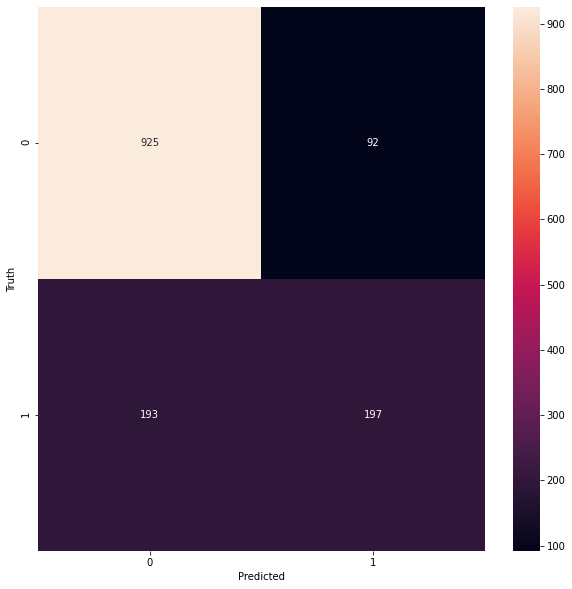

In [72]:
plt.figure(figsize=(10,10))
sns.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [81]:
accuracy=round((925+197)/(925+197+193+92),4)
accuracy

0.7974

# Precision score for 0 means how many sample it predicted to be 0

In [82]:
precision_zero=round(925/(925+193),4)

In [83]:
precision_zero

0.8274

In [86]:
precision_one=round(197/(197+92),4)

In [87]:
precision_one

0.6817

In [88]:
recall_zero=round(925/(925+92),4)
recall_one=round(197/(197+193),4)

In [89]:
recall_one

0.5051

In [90]:
recall_zero

0.9095

In [103]:
f1_zero=2*((precision_zero*recall_zero)/(precision_zero+recall_zero))
f1_one=2*((precision_one*recall_one)/(precision_one+recall_one))

In [104]:
f1_zero=round(f1_zero,4)
f1_one=round(f1_one,4)

In [105]:
f1_zero

0.8665

In [106]:
f1_one

0.5803